In [1]:
import tensorflow as tf
import numpy as np

# 예제 7.6 : 곱셈 문제 데이터 생성
X = []
Y = []

for i in range(3000):
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만듭니다.
  lst = np.random.rand(100)

  # 마킹할 숫자 2개의 인덱스를 뽑습니다.
  idx = np.random.choice(100, 2, replace = False)
  
  # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
  zeros = np.zeros(100)
  zeros[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst))))

  # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다.
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.4189178 ]
 [0.         0.81800405]
 [0.         0.76136667]
 [0.         0.52342004]
 [0.         0.6457072 ]
 [0.         0.83626969]
 [0.         0.49534316]
 [0.         0.20939279]
 [0.         0.1552303 ]
 [0.         0.97038626]
 [0.         0.11200805]
 [0.         0.04780788]
 [0.         0.87104577]
 [0.         0.9292339 ]
 [0.         0.73004116]
 [0.         0.90422944]
 [0.         0.30314043]
 [0.         0.66531171]
 [0.         0.15131691]
 [0.         0.59087003]
 [0.         0.65580703]
 [0.         0.74294998]
 [0.         0.01185304]
 [0.         0.22198374]
 [0.         0.45492174]
 [0.         0.02197236]
 [0.         0.7778712 ]
 [0.         0.90836583]
 [0.         0.18277955]
 [0.         0.08140772]
 [0.         0.7029844 ]
 [0.         0.99927331]
 [0.         0.77308901]
 [0.         0.10048526]
 [0.         0.71247281]
 [0.         0.74143051]
 [0.         0.54176963]
 [0.         0.24664042]
 [0.         0.1250169 ]
 [0.         0.49077302]


In [2]:
# 예제 7.7 : SimpleRNN 레이어를 이용한 곱셈 문제 모델 정의
# return_sequences = True : 레이어의 출력을 다음 레이어로 그대로 넘겨주게 됩니다.
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.SimpleRNN(units = 30),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = 'adam', loss = 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 예제 7.8 : SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)

# 2560개의 데이터만 학습시킵니다. 검증 데이터는 20%로 지정합니다.
history = model.fit(X[: 2560], Y[: 2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0503 - val_loss: 0.0453
Epoch 2/100
64/64 [==============================] - 5s 78ms/step - loss: 0.0503 - val_loss: 0.0470
Epoch 3/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0503 - val_loss: 0.0457
Epoch 4/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0502 - val_loss: 0.0452
Epoch 5/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0499 - val_loss: 0.0466
Epoch 6/100
64/64 [==============================] - 5s 78ms/step - loss: 0.0509 - val_loss: 0.0452
Epoch 7/100
64/64 [==============================] - 5s 78ms/step - loss: 0.0514 - val_loss: 0.0448
Epoch 8/100
64/64 [==============================] - 5s 80ms/step - loss: 0.0506 - val_loss: 0.0441
Epoch 9/100
64/64 [==============================] - 5s 78ms/step - loss: 0.0508 - val_loss: 0.0457
Epoch 10/100
64/64 [==============================] - 5s 79ms/step - loss: 0.0507 - val_loss: 0.0444

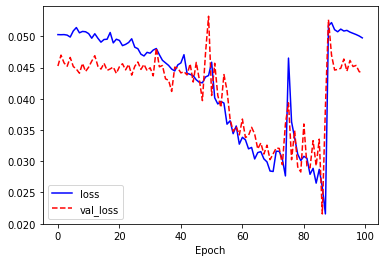

In [7]:
# 예제 7.9 : SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
# 예제 7.10 : 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560 : ], Y[2560 : ])
prediction = model.predict(X[2560 : 2560 + 5])

# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560 :])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.04 이상이면 오답입니다.
  if abs(prediction[i][0] - Y[2560 + i]) > 0.04:
    fail += 1

print("correctness:", (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 12ms/step - loss: 0.0532
0.38155683438702037 	 0.25285748 	diff: 0.12869935791416576
0.006085022093336964 	 0.19146009 	diff: 0.1853750658020564
0.0015631788087901073 	 0.19637065 	diff: 0.1948074675487462
0.2807667773586518 	 0.2832526 	diff: 0.0024858194965117764
0.8052914308194508 	 0.19083545 	diff: 0.6144559847001423
correctness: 11.818181818181818 %


In [9]:
# 예제 7.11 : LSTM 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 예제 7.12 : LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[: 2560], Y[: 2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 1s 19ms/step - loss: 0.0558 - val_loss: 0.0462
Epoch 2/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0505 - val_loss: 0.0447
Epoch 3/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0503 - val_loss: 0.0455
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0506 - val_loss: 0.0454
Epoch 5/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0506 - val_loss: 0.0450
Epoch 6/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0504 - val_loss: 0.0448
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0501 - val_loss: 0.0461
Epoch 8/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0506 - val_loss: 0.0446
Epoch 9/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0504 - val_loss: 0.0445
Epoch 10/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0503 - val_loss: 0.0445

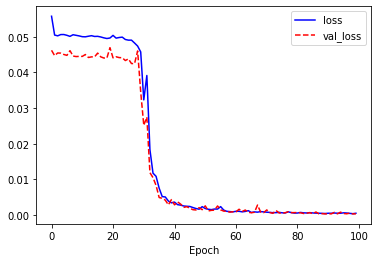

In [11]:
# 예제 7.13 : LSTM 네트워크의 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [12]:
# 예제 7.14 : 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560 : ], Y[2560 : ])
prediction = model.predict(X[2560 : 2560 + 5])

for i in range(5):
  print(Y[2560 + i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560 : ])
cnt = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560 + i]) > 0.04:
    cnt += 1

print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 5ms/step - loss: 3.1835e-04
0.38155683438702037 	 0.3657798 	diff: 0.01577704708500316
0.006085022093336964 	 0.01278045 	diff: 0.006695428191144085
0.0015631788087901073 	 0.034043334 	diff: 0.03248015561570559
0.2807667773586518 	 0.2675857 	diff: 0.013181082568765323
0.8052914308194508 	 0.80713814 	diff: 0.0018467141504894258
correctness: 97.5 %
